In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression/student_depression_dataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/depression/student_depression_dataset.csv")
print(data.head())
df_copy = data.copy()

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
data['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [5]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
data['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

# Cleaning the Data

## Converting column 'Sleep Duration' to only numerical values.

In [7]:
## Converting column 'Sleep Duration' to only numerical values.

data['Sleep Duration'] = data['Sleep Duration'].str.strip("'").str.strip()


sleep_map = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
    "Others": 5  # 5 beacause majorty of the values are 4 and less than that is 5.5
}

data['Sleep Duration (hours)'] = data['Sleep Duration'].map(sleep_map)



In [8]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [9]:
data['Sleep Duration (hours)'].unique()
# Done

array([5.5, 4. , 7.5, 9. , 5. ])

## Change 'Yes' and 'No' columns to 1 and 0

In [10]:
data['Family History of Mental Illness'].unique() # confirming the values in the column. 

array(['No', 'Yes'], dtype=object)

In [11]:
data['Have you ever had suicidal thoughts ?'].unique() # confirming the values column.

array(['Yes', 'No'], dtype=object)

In [12]:
yes_no_map = {"Yes":1, "No":0}

data['Suicidal Thoughts'] = data["Have you ever had suicidal thoughts ?"].map(yes_no_map)
data['Family History'] = data["Family History of Mental Illness"].map(yes_no_map)

In [13]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0            0.0  8.97                 2.0               0.0  ...   
1            0.0  5.90                 5.0               0.0  ...   
2            0.0  7.03                 5.0               0.0  ...   
3            0.0  5.59                 2.0               0.0  ...   
4            0.0  8.13                 3.0               0.0  ...   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                 

## Exploring and cleaning "Dietary Habits column"

In [14]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [15]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [16]:
diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 0  # 0 because Majority of the sudents had unhealthy habits
}

data['Dietary Score'] = data['Dietary Habits'].map(diet_map)


In [17]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...   Degree  \
0            0.0  8.97                 2.0               0.0  ...  B.Pharm   
1            0.0  5.90                 5.0               0.0  ...      BSc   
2            0.0  7.03                 5.0               0.0  ...       BA   
3            0.0  5.59                 2.0               0.0  ...      BCA   
4            0.0  8.13                 3.0               0.0  ...   M.Tech   

  Have you ever had suicidal thoughts ? Work/Study Hours Financial Stress  \
0                                   Yes      

### Done cleaning.

# Exploring the Data

In [18]:




# # ✅ Optional, but improves Seaborn plot styling
# sns.set(style="whitegrid")


## Q1) Distribution of Depression Cases

In [19]:
print(data['Depression'].unique())
print(data['Depression'].value_counts())
print(data['Depression'].dtype)


[1 0]
Depression
1    16336
0    11565
Name: count, dtype: int64
int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


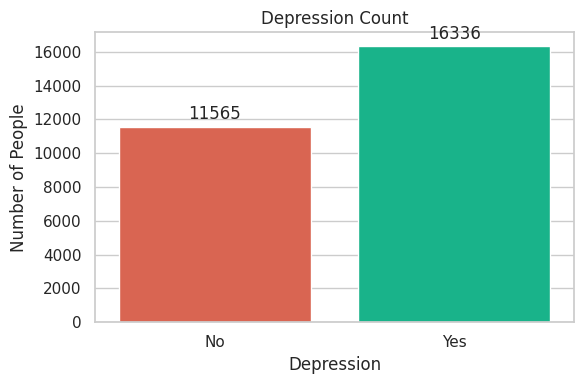

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare data
depression_counts = data['Depression'].value_counts().sort_index()
depression_labels = ['No', 'Yes']

# Convert depression_counts to a pandas Series (if not already)
depression_counts = pd.Series(depression_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=depression_labels, y=depression_counts.values, palette=["#EF553B", "#00CC96"])

# Add labels
plt.title("Depression Count")
plt.xlabel("Depression")
plt.ylabel("Number of People")
for i, count in enumerate(depression_counts.values):
    plt.text(i, count + 200, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Conclusion:
We can see that 16,336 students are depressed out of 27901 students. which means 58.54% Student are depressed out of 100%. This is very shocking as majority of the students are depressed in India which is the direct reflection of the short-comings of the Indian education education system and environment.

In [21]:
x=(16336/27901)*100
x

58.549872764417046

## Q2) Depression by Gender

In [23]:
import plotly.express as px

fig = px.histogram(
    data,
    x="Gender",
    color="Depression",
    barmode="group",
    title="Depression Distribution by Gender",
    labels={"Gender": "Gender", "Depression": "Depression Status"}
)
fig.show()


In [24]:
data['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [25]:
male_perc = (9115/15547)*100
female_per = (7221/12345)*100
print(male_perc,female_per)

58.62867434231684 58.49331713244228


Conclusion: There is no noticeable gap between percentage the male and female students who are in depression. This also suggests that the male and female population are affected equally by depression.

## Q3) CGPA vs Depression

In [26]:
import plotly.express as px

fig = px.box(data, x='Depression', y='CGPA', color='Depression',
             title='CGPA vs Depression')
fig.update_layout(xaxis_title='Depression', yaxis_title='CGPA')
fig.show()



In [27]:
# Calculate the Pearson correlation between CGPA and Depression
correlation = data['CGPA'].corr(data['Depression'])
print(f"Pearson Correlation between CGPA and Depression: {correlation}")


Pearson Correlation between CGPA and Depression: 0.022210470344461636


Conclusion: Based on this visualization alone, there doesn't appear to be a strong correlation between CGPA and depression status in this student population. Students with depression seem to achieve similar academic performance as measured by CGPA compared to students without depression.

## Q4) Academic & Work Pressure vs Depression

In [ ]:
print(data['Academic Pressure'].unique())
print(data['Work Pressure'].unique())


In [ ]:
print(data[['Academic Pressure','Work Pressure']])

In [ ]:
# Mean Academic Pressure by depression
import plotly.express as px
import pandas as pd

# Group by Depression and calculate mean Academic Pressure
mean_academic = data.groupby('Depression')['Academic Pressure'].mean().reset_index()

fig = px.bar(
    mean_academic,
    x='Depression',
    y='Academic Pressure',
    color='Depression',
    title='Mean Academic Pressure by Depression Status',
    labels={'Depression': 'Depression (0 = No, 1 = Yes)', 'Academic Pressure': 'Mean Academic Pressure'},
    text_auto=True
)
fig.update_layout(template='plotly_white')
fig.show()


In [30]:
# Mean Work Pressure by depression

# Group by Depression and calculate mean Work Pressure
mean_work = data.groupby('Depression')['Work Pressure'].mean().reset_index()

fig = px.bar(
    mean_work,
    x='Depression',
    y='Work Pressure',
    color='Depression',
    title='Mean Work Pressure by Depression Status',
    labels={'Depression': 'Depression (0 = No, 1 = Yes)', 'Work Pressure': 'Mean Work Pressure'}
)
fig.update_layout(template='plotly_white')
fig.show()


In [31]:
data['Work Pressure'].unique()

array([0., 5., 2.])

In [32]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency tables
academic_ct = pd.crosstab(data['Academic Pressure'], data['Depression'])
work_ct = pd.crosstab(data['Work Pressure'], data['Depression'])

# Perform chi-square test
chi2_academic, p_academic, _, _ = chi2_contingency(academic_ct)
chi2_work, p_work, _, _ = chi2_contingency(work_ct)

print(f"Chi-square Test - Academic Pressure vs Depression: p-value = {p_academic:.4f}")
print(f"Chi-square Test - Work Pressure vs Depression: p-value = {p_work:.4f}")


Chi-square Test - Academic Pressure vs Depression: p-value = 0.0000
Chi-square Test - Work Pressure vs Depression: p-value = 0.4788


Academic Pressure is a strong factor: There's a measurable difference in depression rates at different levels of academic pressure.

Work Pressure seems irrelevant here (or underreported/poorly distributed — recall it only had values 0, 2, 5).

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [34]:
data['Job Satisfaction'].unique()

array([0., 3., 4., 2., 1.])

## Q5)  Is there a relationship between Work Pressure and Job Satisfaction?

In [35]:
# Spearman correlation (better for ordinal data)
corr = data[['Work Pressure', 'Job Satisfaction']].corr(method='spearman')
print("Spearman Correlation:\n", corr)


Spearman Correlation:
                   Work Pressure  Job Satisfaction
Work Pressure          1.000000          0.612361
Job Satisfaction       0.612361          1.000000


In [36]:
import plotly.express as px

fig = px.box(
    data,
    x='Work Pressure',
    y='Job Satisfaction',
    title='Job Satisfaction Across Different Work Pressure Levels',
    labels={'Work Pressure': 'Work Pressure', 'Job Satisfaction': 'Job Satisfaction'}
)
fig.show()


In [37]:
import plotly.express as px
import pandas as pd

# Create crosstab
heatmap_data = pd.crosstab(data['Work Pressure'], data['Job Satisfaction'])

# Convert to tidy format for Plotly
heatmap_melted = heatmap_data.reset_index().melt(id_vars='Work Pressure', value_name='Count')

# Heatmap
fig = px.density_heatmap(
    heatmap_melted,
    x='Job Satisfaction',
    y='Work Pressure',
    z='Count',
    color_continuous_scale='gnbu',
    title='Heatmap of Work Pressure vs Job Satisfaction',
    labels={'Count': 'Number of People'}
)
fig.show()


We can see that there is a direct correlation between job satisfaction and work pressure which has a positive corr of 0.6

## Q6) How much dietary habbits contribute to depression

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [40]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [46]:
data["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [50]:
data["Dietary Score"].value_counts()

Dietary Score
0    10329
1     9921
2     7651
Name: count, dtype: int64

In [68]:
mean_depression = data.groupby('Dietary Score')['Depression'].mean().reset_index()

fig = px.bar(
    mean_depression,
    x='Dietary Score',
    y='Depression',
    title='Average Depression Rate by Dietary Habits',
    labels={'Depression': 'Average Depression Rate', 'Dietary Score': 'Diet Quality (0=Unhealthy, 2=Healthy)'}
)
fig.show()


In [67]:
mean_depression

,Dietary Score,Depression
0,0,0.707232
1,1,0.560226
2,2,0.453928


This tells us that 70% of students who have unhealthy dietary habbits have depression. 
56% of students with moderate dietary habbits have depression.
This shows that the dietary habbits affect the lifestyle of the students and also is an important factor contributing to their depression

In [72]:
# Stastical Test: Chi-Square Test

import scipy.stats as stats
import pandas as pd

# create contingency_table
conti_table = pd.crosstab(data["Dietary Score"], data['Depression'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(conti_table)

print("Chi-square Test Results:")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

Chi-square Test Results:
Chi2 statistic = 1202.5567
p-value = 0.0000


since p-value is 0.000 < 0.05 


In [76]:
import numpy as np

n = conti_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(conti_table.shape)-1)))
print(f"Cramér’s V = {cramer_v:.4f}")


Cramér’s V = 0.2076


# Q7) Does sleep duration of students affect depression?

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [93]:
data['Sleep Duration (hours)'].unique()

array([5.5, 4. , 7.5, 9. , 5. ])

In [85]:
mean_dep_sleep = data.groupby("Sleep Duration (hours)")['Depression'].mean().reset_index()

fig = px.bar(
    mean_dep_sleep,
    x="Sleep Duration (hours)",
    y="Depression",
    title='Average Depression Rate by Sleep Duration',
    labels={'Depression': 'Average Depression Rate', 'Sleep Duration': 'Sleep Duration (4 hours-9 hours)'}
)
fig.show()


In [89]:
mean_dep_sleep

,Sleep Duration (hours),Depression
0,4.0,0.645126
1,5.0,0.500000
2,5.5,0.568818
3,7.5,0.595018
4,9.0,0.509265


In [94]:
# Stastical Test: Chi-Square Test

import scipy.stats as stats
import pandas as pd

# create contingency_table
contin_table = pd.crosstab(data["Sleep Duration (hours)"], data['Depression'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contin_table)

print("Chi-square Test Results:")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

Chi-square Test Results:
Chi2 statistic = 276.8484
p-value = 0.0000


In [95]:
import numpy as np
import scipy.stats as stats

# Contingency table
contingency_table = pd.crosstab(data['Sleep Duration (hours)'], data['Depression'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér’s V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér’s V = {cramers_v:.4f}")


Cramér’s V = 0.0996


we can see that 64% of depressed students are having sleep less than 4 hours but on ther other hand 60% of the students who are having an 7-8 hour of sleep are also depressed. Thus we can safely say that only sleep does not affect depression of students. 

# Q8) 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di